In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
positiveSalivaSensor1Path = '/content/drive/MyDrive/datasets/voltametria/Sensor 1 (AA)/Saliva/Positiva'
positiveSalivaSensor2Path = '/content/drive/MyDrive/datasets/voltametria/Sensor 2 (PEI)/Saliva/Positiva'
negativeSalivaSensor1Path = '/content/drive/MyDrive/datasets/voltametria/Sensor 1 (AA)/Saliva/Negativa'
negativeSalivaSensor2Path = '/content/drive/MyDrive/datasets/voltametria/Sensor 2 (PEI)/Saliva/Negativa'
positiveUrineSensor1Path = '/content/drive/MyDrive/datasets/voltametria/Sensor 1 (AA)/Urina/Positiva'
positiveUrineSensor2Path = '/content/drive/MyDrive/datasets/voltametria/Sensor 2 (PEI)/Urina/Positiva'
negativeUrineSensor1Path = '/content/drive/MyDrive/datasets/voltametria/Sensor 1 (AA)/Urina/Negativa'
negativeUrineSensor2Path = '/content/drive/MyDrive/datasets/voltametria/Sensor 2 (PEI)/Urina/Negativa'

def getFilesList():
    salivaFiles = next(os.walk(positiveSalivaSensor1Path), (None, None, []))[2] +\
                  next(os.walk(positiveSalivaSensor2Path), (None, None, []))[2] +\
                  next(os.walk(negativeSalivaSensor1Path), (None, None, []))[2] +\
                  next(os.walk(negativeSalivaSensor2Path), (None, None, []))[2]

    urineFiles = next(os.walk(positiveUrineSensor1Path), (None, None, []))[2] +\
                 next(os.walk(positiveUrineSensor2Path), (None, None, []))[2] +\
                 next(os.walk(negativeUrineSensor1Path), (None, None, []))[2] +\
                 next(os.walk(negativeUrineSensor2Path), (None, None, []))[2]

    return salivaFiles, urineFiles

def getFilesToDataframe(path, filelist):
    df = pd.read_csv(f'{path}/{filelist}', delimiter = "\t", header = None, decimal=",")
    return df

def convertColumnsToNumbers(df):
    df.replace(',', '.', inplace = True, regex = True)
    df = df.astype(float)
    return df

def applyLog10(df):
    df[0] = np.log10(df[0]+1)
    return df

def roundCols(df):
    cols = [np.round(x, 3) for x in df.columns.values]
    df.columns = cols
    return df

def preprocessingData(df, pathName):
    new_df = convertColumnsToNumbers(df)
    new_df = applyLog10(new_df)
    new_df = new_df.set_index(0).T
    new_df = roundCols(new_df)
    new_df['target'] = 1 if 'positive' in pathName else 0
    new_df['sensorType'] = 1 if '1' in pathName else 2
    new_df['substanceType'] = 'saliva' if 'saliva' in pathName else 'urine'
    return new_df

def mergeData(df1, df2, how):
    return pd.merge(df1, df2, how = how)

def resetIndexes(dfs, inplace, drop):
    for df in dfs:
        df.reset_index(inplace = inplace, drop = drop)

def concatAllFiles(urlFiles, fileList):
    df_merged = pd.DataFrame()
    df_sensor1 = pd.DataFrame()
    df_sensor2 = pd.DataFrame()
    n = 0

    for pathName, filePath in urlFiles.items():
        for i in range(1, 11):
            filename = str(i) + '.txt'
            new_df = getFilesToDataframe(filePath, filename)

            if '1' in pathName:
                sample = preprocessingData(new_df, pathName)
                df_sensor1 = pd.concat([df_sensor1, sample])
            else:
                sample = preprocessingData(new_df, pathName)
                df_sensor2 = pd.concat([df_sensor2, sample])

    #columnsSensor1 = set(df_sensor1.columns)
    #columnsSensor2 = set(df_sensor2.columns)
    #mergedColumns = columnsSensor2.intersection(columnsSensor1)

    df_merged = mergeData(df_sensor1, df_sensor2, 'outer')
    resetIndexes([df_merged, df_sensor1, df_sensor2], True, True)

    return df_merged, df_sensor1, df_sensor2

        

salivaFiles, urineFiles = getFilesList()

allFiles = {'salivaFiles': salivaFiles, 
            'urineFiles': urineFiles}

urlFiles = {'positiveSalivaSensor1': positiveSalivaSensor1Path, 
            'positiveSalivaSensor2': positiveSalivaSensor2Path, 
            'negativeSalivaSensor1': negativeSalivaSensor1Path, 
            'negativeSalivaSensor2': negativeSalivaSensor2Path, 
            'positiveUrineSensor1': positiveUrineSensor1Path, 
            'positiveUrineSensor2': positiveUrineSensor2Path, 
            'negativeUrineSensor1': negativeUrineSensor1Path, 
            'negativeUrineSensor2': negativeUrineSensor2Path}


df, df1, df2 = concatAllFiles(urlFiles, allFiles)  



df1.head()

,-0.222,-0.211,-0.201,-0.19,-0.181,-0.171,-0.161,-0.152,-0.143,-0.134,...,0.232,0.236,0.24,0.243,0.247,0.251,0.254,target,sensorType,substanceType
0,1.372380e-06,9.760030e-07,7.926390e-07,6.840420e-07,6.236630e-07,6.024080e-07,5.988530e-07,6.162030e-07,6.536330e-07,6.927720e-07,...,4.630160e-07,5.643800e-07,6.596410e-07,7.487990e-07,8.440600e-07,9.271140e-07,1.016270e-06,1,1,urine
1,5.979030e-07,1.060260e-07,-1.255360e-07,-2.646290e-07,-3.432980e-07,-3.774120e-07,-3.877210e-07,-3.683070e-07,-3.293300e-07,-2.720740e-07,...,3.098460e-07,4.118420e-07,5.229920e-07,6.463490e-07,7.788620e-07,9.144260e-07,1.062200e-06,1,1,urine
2,3.712900e-07,-1.177110e-07,-3.579930e-07,-5.024500e-07,-5.873980e-07,-6.265690e-07,-6.407170e-07,-6.255670e-07,-5.864610e-07,-5.309670e-07,...,2.451220e-07,3.466360e-07,4.542540e-07,5.801830e-07,7.122150e-07,8.534020e-07,1.009850e-06,1,1,urine
3,1.654070e-06,1.279370e-06,1.097240e-06,9.892640e-07,9.239530e-07,8.941040e-07,8.797880e-07,8.828980e-07,9.000160e-07,9.233280e-07,...,2.670720e-07,3.263350e-07,3.794930e-07,4.357040e-07,5.010700e-07,5.633840e-07,6.318010e-07,1,1,urine
4,9.801290e-07,4.811820e-07,2.333940e-07,7.898970e-08,-1.773620e-08,-7.234780e-08,-1.026370e-07,-1.036290e-07,-8.582250e-08,-5.599190e-08,...,1.386390e-07,2.070130e-07,2.845430e-07,3.681760e-07,4.640160e-07,5.659590e-07,6.770580e-07,1,1,urine


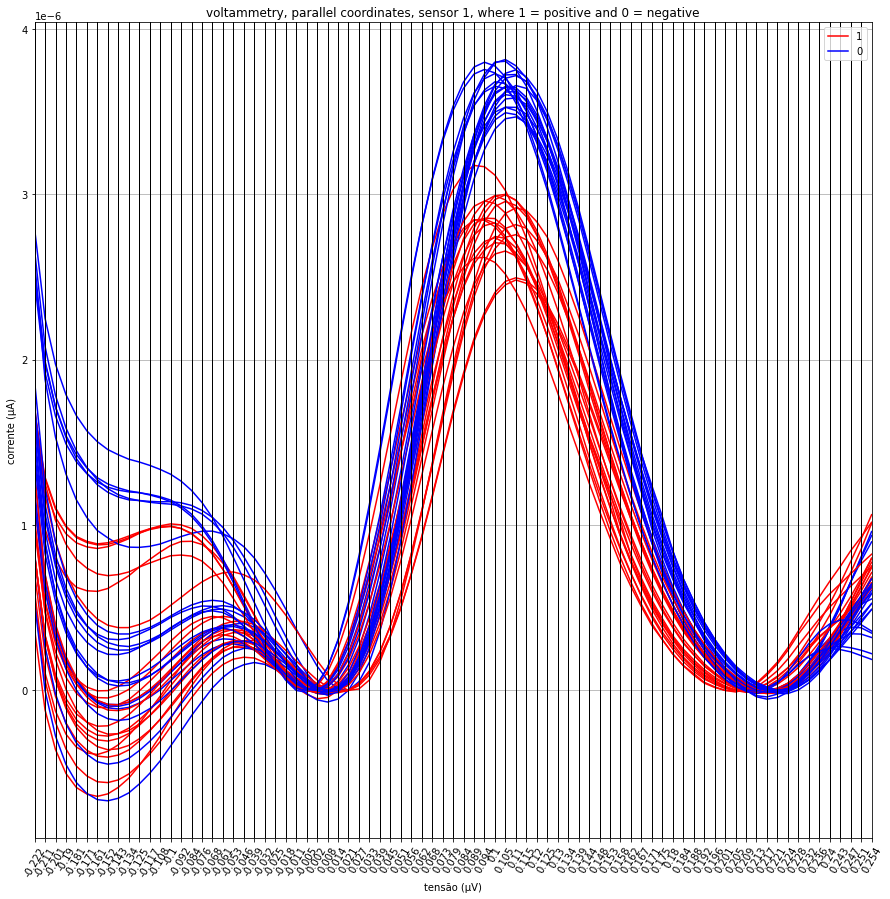

In [3]:
def plotParallelCoordinates(df, title, xlabel, ylabel, target, colors):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15))

    new_df = df.drop(['sensorType', 'substanceType'], axis = 1)

    pd.plotting.parallel_coordinates(frame = new_df, class_column = target, ax = ax, color = colors)
    ax.set(title = title,
           xlabel = xlabel,
           ylabel = ylabel)
    plt.xticks(rotation = 60)
    
    plt.show()


plotParallelCoordinates(df = df1,
                        title = 'voltammetry, parallel coordinates, sensor 1, where 1 = positive and 0 = negative',
                        xlabel = 'tensão (µV)',
                        ylabel = 'corrente (µA)',
                        target = 'target',
                        colors = ['red', 'blue']
                        )


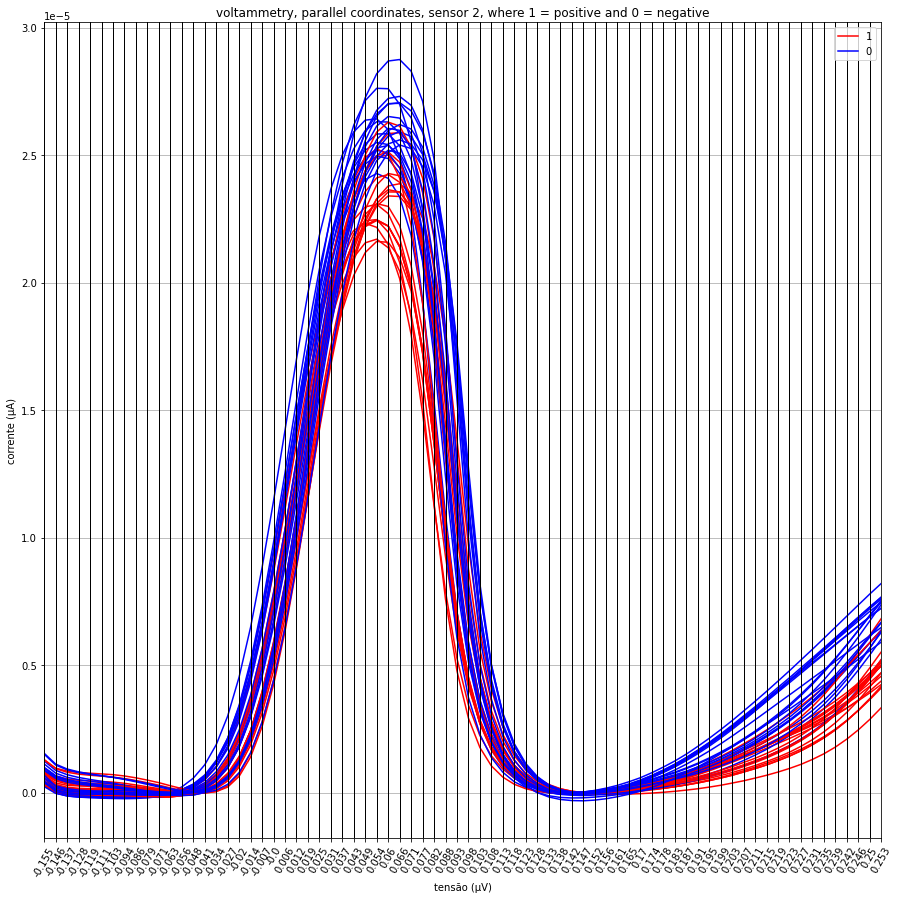

In [4]:
plotParallelCoordinates(df = df2,
                        title = 'voltammetry, parallel coordinates, sensor 2, where 1 = positive and 0 = negative',
                        xlabel = 'tensão (µV)',
                        ylabel = 'corrente (µA)',
                        target = 'target',
                        colors = ['red', 'blue']
                        )


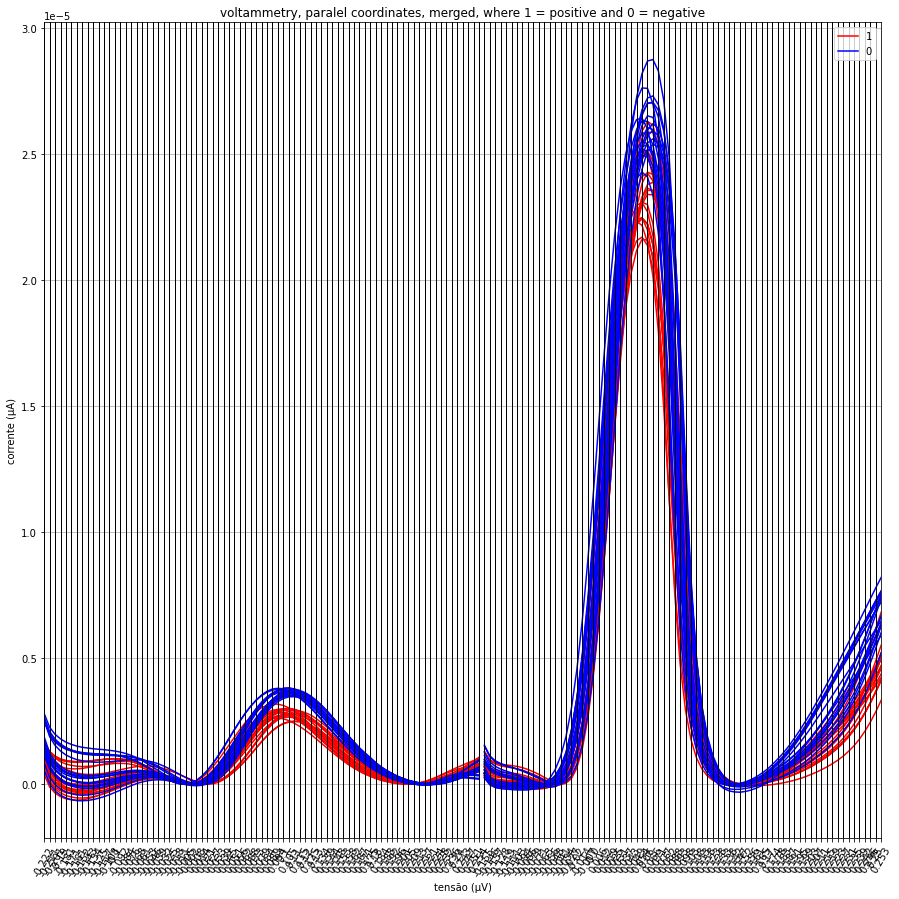

In [5]:
plotParallelCoordinates(df = df,
                        title = 'voltammetry, paralel coordinates, merged, where 1 = positive and 0 = negative',
                        xlabel = 'tensão (µV)',
                        ylabel = 'corrente (µA)',
                        target = 'target',
                        colors = ['red', 'blue']
                        )

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


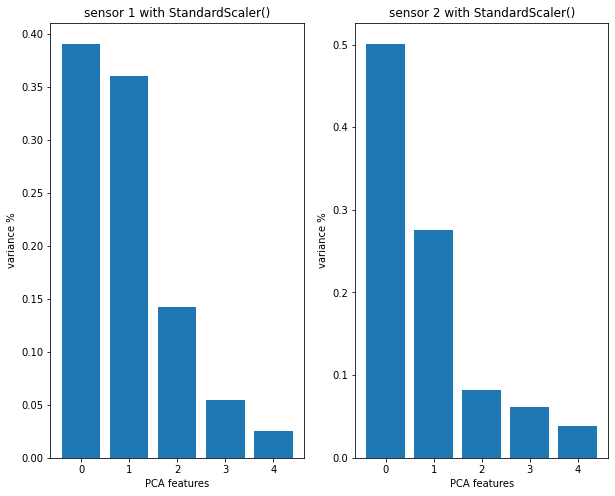

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


def calculatingPCA(df, nameSensor, scaler, n_components, ax):
    X = df.drop(['target', 'sensorType', 'substanceType'], axis = 1)
    X_std = scaler.fit_transform(X)
    pca = PCA(n_components = n_components)
    principalComponents = pca.fit_transform(X_std)
    
    new_df = pd.DataFrame(principalComponents)
    new_df['target'] = df['target'].values

    features = np.arange(pca.n_components)
    ax.bar(features, pca.explained_variance_ratio_)
    ax.set(xlabel = 'PCA features', ylabel = 'variance %', xticks = features, title = f'{nameSensor} with {scaler}')
    
    return new_df


fig, ax = plt.subplots(1, 2, figsize = (10, 8))

PCA_components = {}
PCA_components['sensor1'] = calculatingPCA(df1, 'sensor 1', StandardScaler(), 5, ax[0])
PCA_components['sensor2'] = calculatingPCA(df2, 'sensor 2', StandardScaler(), 5, ax[1])

plt.show()


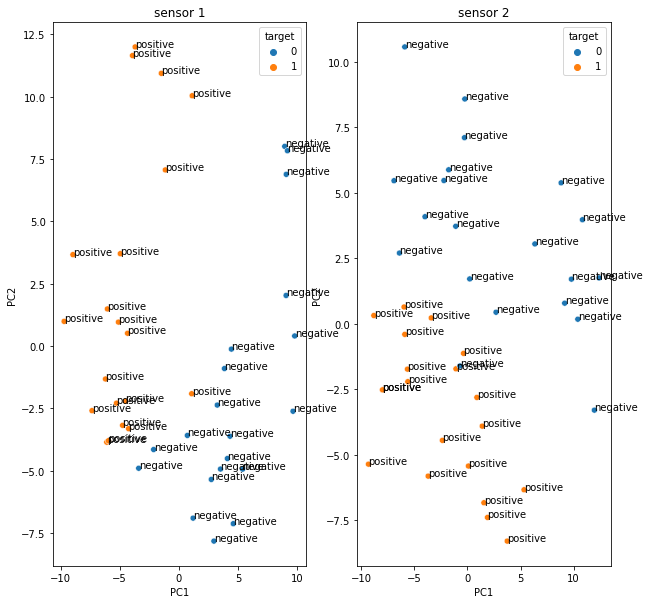

In [8]:
def writeInPlot(df, ax):
    for i in range(len(df)):
        name = 'positive' if df['target'][i] == 1 else 'negative'
        ax.text(x = df.loc[i, 0], y = df.loc[i,1], s = name)


def plotPCA(df, title, ax):
    
    sns.scatterplot(data = df, x = 0, y = 1, hue = 'target', ax = ax)
    ax.set(xlabel = 'PC1', ylabel = 'PC2', title = title)
    writeInPlot(df, ax)
    

fig, ax = plt.subplots(1, 2, figsize = (10, 10))

plotPCA(df = PCA_components['sensor1'], 
        title = 'sensor 1', 
        ax = ax[0]
        )

plotPCA(df = PCA_components['sensor2'], 
        title = 'sensor 2', 
        ax = ax[1]
        )

plt.show()

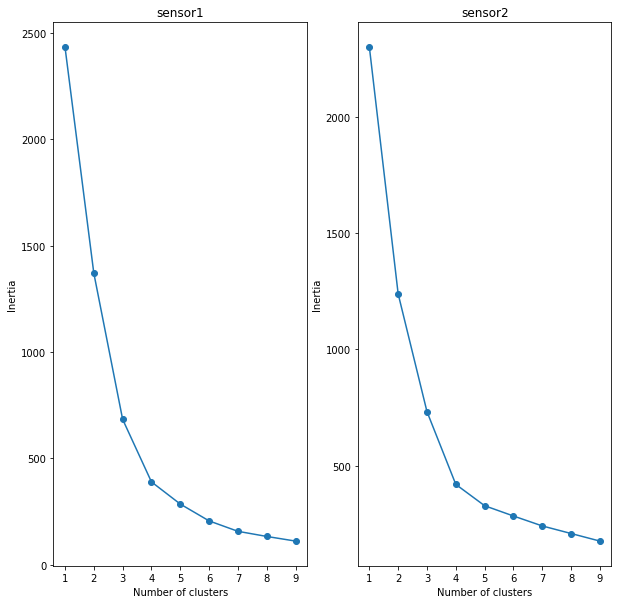

In [9]:
from sklearn.cluster import KMeans

fig, ax = plt.subplots(1, 2, figsize = (10, 10))

ks = range(1, 10)

inertia_model1 = []
inertia_model2 = []


for k in ks:

    np.random.seed(42)
    model1 = KMeans(n_clusters = k)
    model2 = KMeans(n_clusters = k)

    model1.fit(PCA_components['sensor1'].iloc[:, :2])
    model2.fit(PCA_components['sensor2'].iloc[:, :2])

    inertia_model1.append(model1.inertia_)
    inertia_model2.append(model2.inertia_) 

ax[0].plot(ks, inertia_model1, '-o')
ax[0].set(xlabel = 'Number of clusters', ylabel = 'Inertia', title = 'sensor1', xticks = ks)
ax[1].plot(ks, inertia_model2, '-o')
ax[1].set(xlabel = 'Number of clusters', ylabel = 'Inertia', title = 'sensor2', xticks = ks)

plt.show()


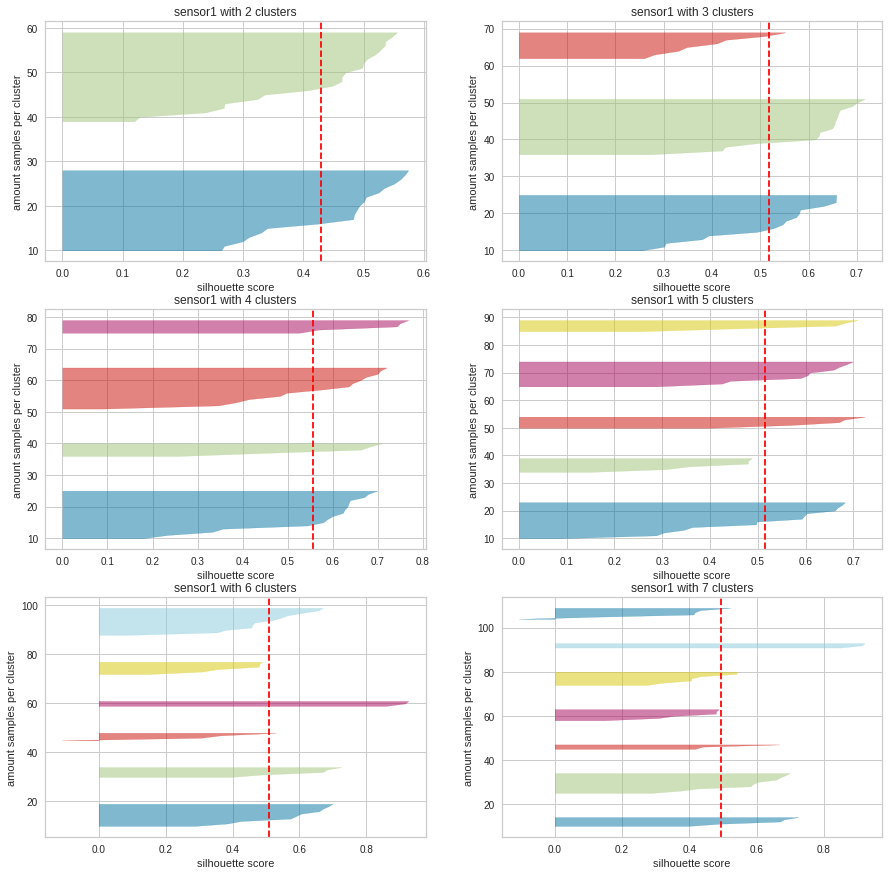

In [10]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

def plotSilhoetteVisualizer(X, Ks, ax, sensorName):
    silhouette_coef_list = []
    for k in Ks:
        np.random.seed(42)
        km_model = KMeans(n_clusters = k)
        q, mod = divmod(k,2)
        visualizer = SilhouetteVisualizer(km_model, colors = 'yellowbrick', ax = ax[q-1][mod])
        ax[q-1][mod].set(title = f'{sensorName} with {k} clusters', 
                         xlabel = 'silhouette score', 
                         ylabel = 'amount samples per cluster')
        visualizer.fit(X)
        #print(f"{sensorName}: the silhouette's score for {k} clusters is {visualizer.silhouette_score_}")
        silhouette_coef_list.append(visualizer.silhouette_score_)
    return silhouette_coef_list


fig, ax = plt.subplots(3, 2, figsize = (15, 15))
Ks = [2,3,4,5,6,7]
X_sensor1 = PCA_components['sensor1'].iloc[:, :2]
silhouette_sensor1 = plotSilhoetteVisualizer(X_sensor1, Ks, ax, 'sensor1')

plt.show()


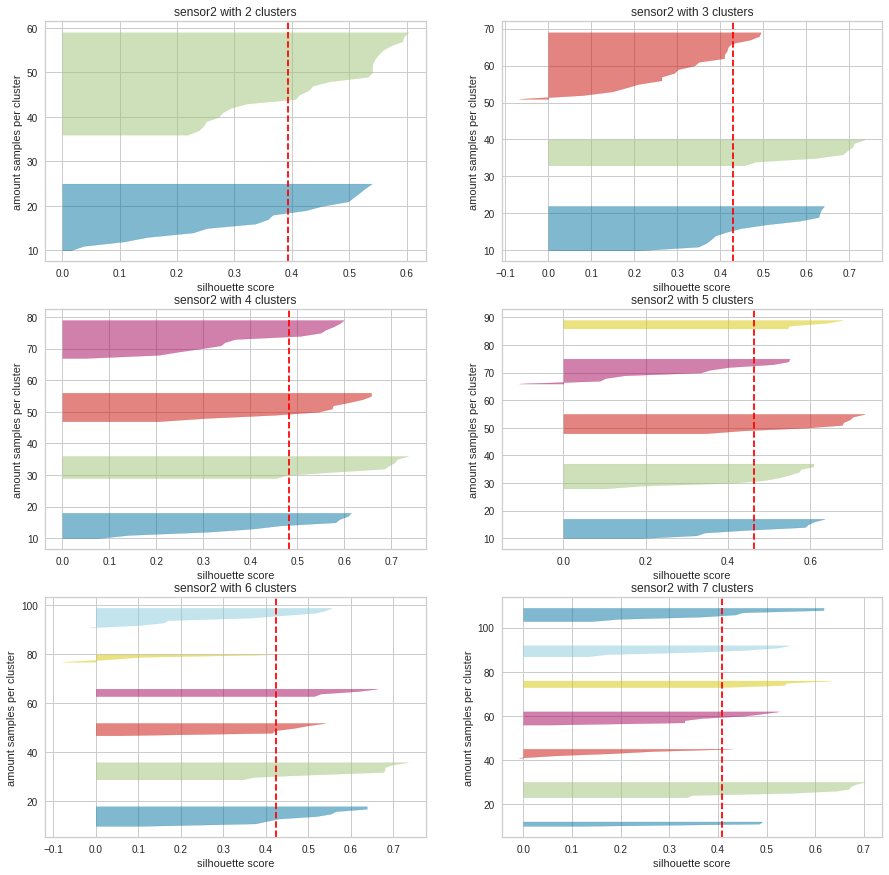

In [11]:
fig, ax = plt.subplots(3, 2, figsize = (15, 15))
X_sensor2 = PCA_components['sensor2'].iloc[:, :2]
Ks = [2,3,4,5,6,7]

silhouette_sensor2 = plotSilhoetteVisualizer(X_sensor2, Ks, ax, 'sensor2')

plt.show()

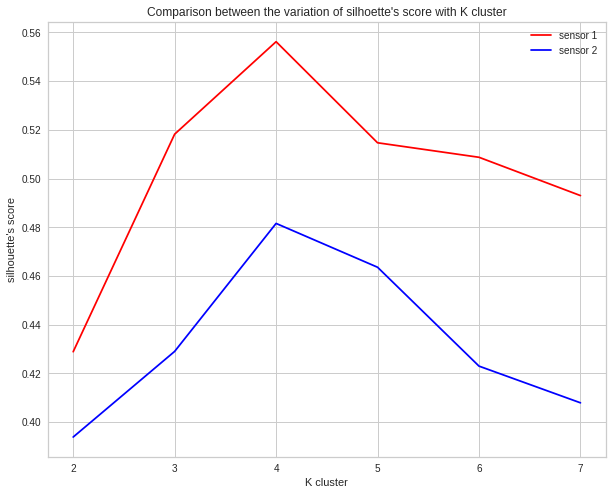

In [12]:
def plot_silhouette_score(silhouette_scores, ax, Ks):
    sns.lineplot(data = silhouette_scores, x= 'Ks', y = 'sensor_1', color = 'red', ax=ax, label = 'sensor 1')
    sns.lineplot(data = silhouette_scores, x= 'Ks', y = 'sensor_2', color = 'blue', ax=ax, label = 'sensor 2')
    ax.set(title = "Comparison between the variation of silhoette's score with K cluster",
           xlabel = 'K cluster',
           ylabel = "silhouette's score"
    )
    plt.legend()

Ks = [2,3,4,5,6,7]
silhouette_scores = {
    'sensor_1': silhouette_sensor1,
    'sensor_2': silhouette_sensor2,
    'Ks': Ks
}


fig, ax = plt.subplots(1, 1, figsize = (10, 8))
plot_silhouette_score(silhouette_scores, ax, Ks)

plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


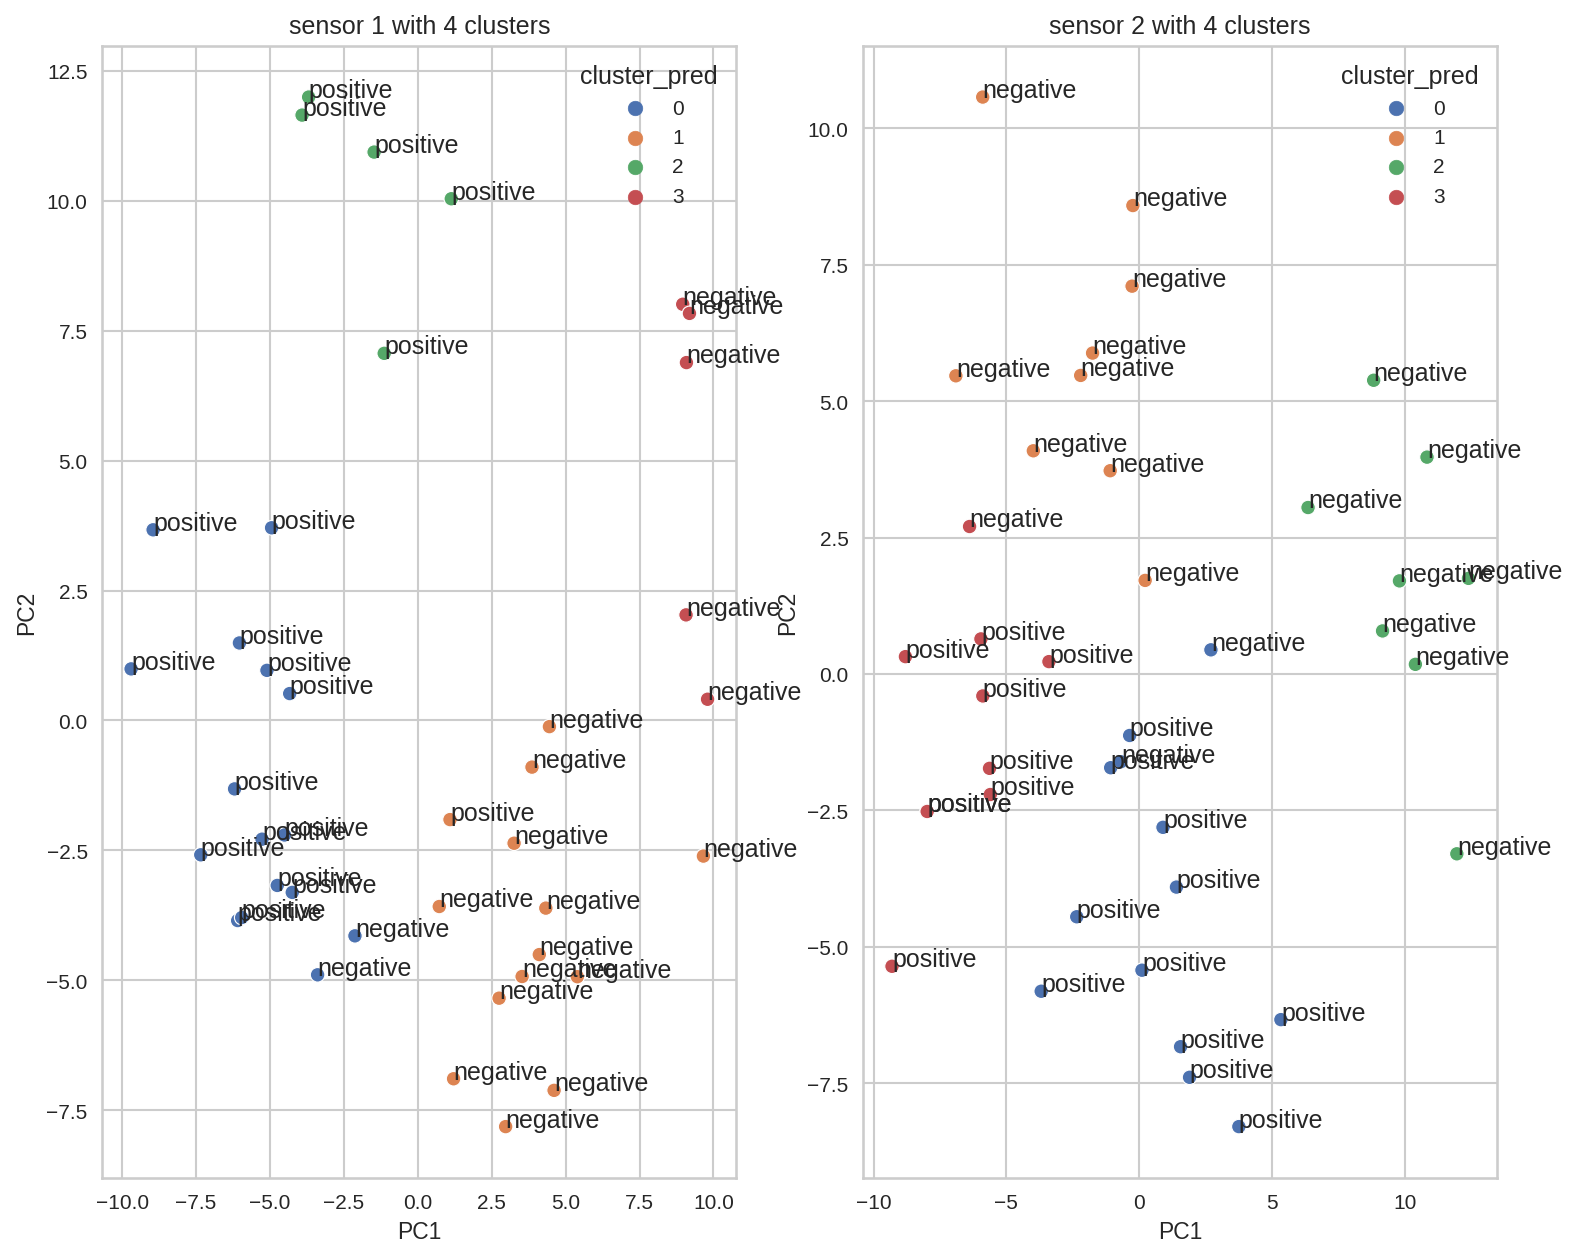

In [15]:
X_list = [X_sensor1, X_sensor2]
fig, ax = plt.subplots(1, 2, figsize = (12,10), dpi = 150)
i = 0

for X in X_list:

    kmeans = KMeans(n_clusters=4)
    cluster_pred = kmeans.fit_predict(X)
    X['cluster_pred'] = cluster_pred
    sns.scatterplot(data = X, x = 0, y = 1, hue = 'cluster_pred', ax = ax[i], palette = 'deep')
    ax[i].set(title = f'sensor {i+1} with 4 clusters',
              xlabel = 'PC1',
              ylabel = 'PC2')
    writeInPlot(PCA_components[f'sensor{i+1}'], ax[i])
    i+= 1


In [54]:
'''
def filterNthHigherValues(df, numberOfIndexes):
    new_data = pd.DataFrame()
    for index, row in df.iterrows():
        filteredData = df.iloc[:,:-3]
        values = filteredData.iloc[index].argsort()[numberOfIndexes:][::-1]
        higherIndexes = values.argsort()[numberOfIndexes:][::-1]
        new_data = pd.concat([new_data, higherIndexes])
    return new_data

filterNthHigherValues(df1, 20)
'''

,0
-0.046,22.0
-0.039,26.0
-0.032,31.0
-0.025,38.0
-0.018,44.0
...,...
0.158,22.0
0.162,25.0
0.167,29.0
0.171,34.0
